# 导入依赖

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import fowlkes_mallows_score
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
warnings.filterwarnings("ignore")

# 数据处理

In [3]:
iris = load_iris()

In [4]:
# 提取iris数据集中的特征
iris_data = iris['data']
print('iris数据集数据的特征为：\n', iris_data)

iris数据集数据的特征为：
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1

In [5]:
# 提取iris数据集中的标签
iris_target = iris['target']
print('iris数据集数据的标签为：\n', iris_target)

iris数据集数据的标签为：
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
# 提取iris数据集中的特征名
iris_names = iris['feature_names']
print('iris数据集数据的特征为：\n', iris_names)

iris数据集数据的特征为：
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


# 训练模型

In [7]:
# 训练规则
scale = MinMaxScaler().fit(iris_data)
# 应用规则
iris_dataScale = scale.transform(iris_data)
# 构建并训练KMeans模型
kmeans = KMeans(n_clusters = 3, random_state=123).fit(iris_dataScale)
print('构建的K-Means模型为：', kmeans)

构建的K-Means模型为： KMeans(n_clusters=3, random_state=123)


In [8]:
# KMeans模型预测
result = kmeans.predict([[1.5,1.5,1.5,1.5]])
print('花瓣花萼长度宽度全为1.5的鸢尾花预测类别为：', result[0])

花瓣花萼长度宽度全为1.5的鸢尾花预测类别为： 0


In [9]:
# 使用TSNE进行数据降维,降成两维
tsne = TSNE(n_components=2, init='random', random_state=177).fit(iris_data)
# 将原始数据转换为DataFrame
df = pd.DataFrame(tsne.embedding_)
# 将聚类结果存储进DataFrame数据表
df['labels'] = kmeans.labels_
# 提取不同标签的数据
df1 = df[df['labels']==0]
df2 = df[df['labels']==1] 
df3 = df[df['labels']==2]

# 绘制图形

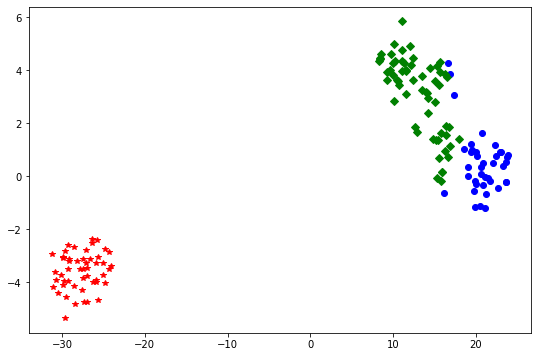

In [10]:
# 设定空白画布并制定大小
fig = plt.figure(figsize=(9,6))
# 用不同的颜色表示不同数据
plt.plot(df1[0], df1[1], 'bo', df2[0], df2[1], 'r*', df3[0], df3[1], 'gD')
# 保存图像
plt.savefig('../images/iris-data.png')
# 显示图像
plt.show()

# 评估模型

In [11]:
for i in range(2,7):
    # 构建并训练模型
    kmeans = KMeans(n_clusters = i, random_state=123).fit(iris_data)
    score = fowlkes_mallows_score(iris_target, kmeans.labels_)
    print('iris数据聚%d类FMI评价分值为：%f' %(i,score))

iris数据聚2类FMI评价分值为：0.750473
iris数据聚3类FMI评价分值为：0.820808
iris数据聚4类FMI评价分值为：0.753970
iris数据聚5类FMI评价分值为：0.725483
iris数据聚6类FMI评价分值为：0.614345


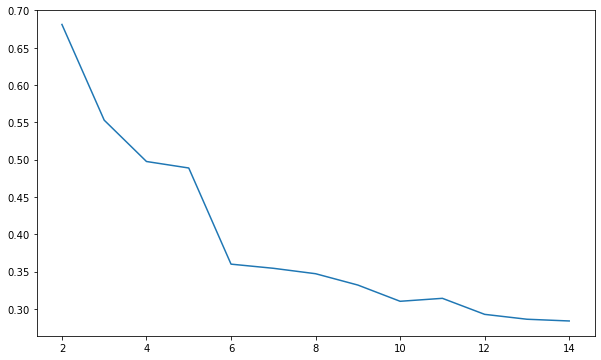

In [12]:
silhouettteScore = []
for i in range(2,15):
    # 构建并训练模型
    kmeans = KMeans(n_clusters = i, random_state=123).fit(iris_data)
    score = silhouette_score(iris_data, kmeans.labels_)
    silhouettteScore.append(score)
plt.figure(figsize=(10,6))
plt.plot(range(2,15),silhouettteScore,linewidth=1.5, linestyle="-")
plt.savefig('../images/iris-轮廓系数.png')
plt.show()

In [13]:
for i in range(2,7):
    # 构建并训练模型
    kmeans = KMeans(n_clusters = i, random_state=123).fit(iris_data)
    score = calinski_harabasz_score(iris_data, kmeans.labels_)
    print('iris数据聚%d类calinski_harabaz指数为：%f'%(i,score))

iris数据聚2类calinski_harabaz指数为：513.924546
iris数据聚3类calinski_harabaz指数为：561.627757
iris数据聚4类calinski_harabaz指数为：530.487142
iris数据聚5类calinski_harabaz指数为：495.541488
iris数据聚6类calinski_harabaz指数为：469.836633
